In [6]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, '/global/u2/h/hyunohy/URAP/regressiononly/functions')
sys.path.insert(0, '/global/u2/h/hyunohy/URAP/regressiononly/training')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from Clusterer import *
from plotting import *
from data_functions import *

2023-05-02 12:44:29.046978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 12:44:29.862828: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /global/common/software/nersc/pm-2022q4/sw/evp-patch/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/math_libs/11.7/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/extras/CUPTI/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/extras/Debugger/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/nvvm/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/lib64:/opt/cray/pe/papi/7.0.0.1/lib64:/

In [8]:
root_file = "hcal_pi-_Theta20n20deg_0-60GeVLogUniform.root"
label ="Fifty_Segmentation3L_HCal_0-60GeVLogUniform20n20deg_Linear"
detector_name = "HcalEndcapPHitsReco" #or "HcalEndcapPInsertHitsReco"
sampling_fraction = 0.02 #or 0.0098

#NEvents_Max = 1_000_000 #OK if tree has less events than this
NEvents_Max = 100
Energy_Bins = binning=np.linspace(0.1,110,21) #Plotting
n_calo_layers = 10

take_log10 = False
normalization = True
if (take_log10):
    Energy_Bins = np.logspace(1,110,21)

Do_Processing = True
Do_Training = True
#saves to path/numpy_file. Only needs to be run frist time. 
# Change to False for messing with plots

In [9]:
if Do_Processing:
    
    Clusterer = Strawman_Clusterer(root_file, label, detector_name, sampling_fraction, NEvents_Max, n_calo_layers,take_log=take_log10, normalization = normalization)
    Clusterer.run_segmentation_clusterer()

    del Clusterer
#Ignore: " DeprecationWarning: `np.str` "

Loaded 100 Events
Getting Cell Z information


/global/homes/h/hyunohy/.local/perlmutter/3.9-anaconda-2021.11/lib/python3.9/site-packages/awkward0/array/base.py:622: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(where, (cls.numpy.ndarray, AwkwardArray)) and issubclass(where.dtype.type, (numpy.str, numpy.str_)):
/global/homes/h/hyunohy/.local/perlmutter/3.9-anaconda-2021.11/lib/python3.9/site-packages/awkward0/array/base.py:624: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

Doing Cluster Sum for z-bin 0...
Doing Cluster Sum for z-bin 1...
Doing Cluster Sum for z-bin 2...
Doing Cluster Sum for z-bin 3...
Doing Cluster Sum for z-bin 4...
Doing Cluster Sum for z-bin 5...
Doing Cluster Sum for z-bin 6...
Doing Cluster Sum for z-bin 7...
Doing Cluster Sum for z-bin 8...
Doing Cluster Sum for z-bin 9...
segmented_cluster_sum: [array([0.02930298, 0.09517822, 0.05710449, 0.02133179, 0.02078857,
       0.10594482, 0.00717163, 0.00321045, 0.00319824, 0.00307007,
       0.00489502, 0.00390015, 0.00384521, 0.00296631, 0.08983154,
       0.27282104, 0.05849609, 0.00396729, 0.00400391, 0.00376587,
       0.00377808, 0.50535889, 0.00276489, 0.0027832 , 0.00853271,
       0.131427  , 0.00489502, 0.0151062 , 0.0121582 , 0.00670776,
       0.00350952, 0.00419922, 0.00823975, 0.00360107, 0.07445679,
       0.00414429, 0.05880737, 0.00800171, 0.04353027, 0.00234375,
       0.00545654, 0.08049927, 0.00354614, 0.01203613, 0.00352783,
       0.06237793, 0.0059021 , 0.00929565, 

In [10]:
ClusterSum = load_ClusterSum(label)
segmented_ClusterSum = load_segmented_ClusterSum(label)
GenP = load_GenP(label)

Plotting QA Distributions...
N Z bins = 10


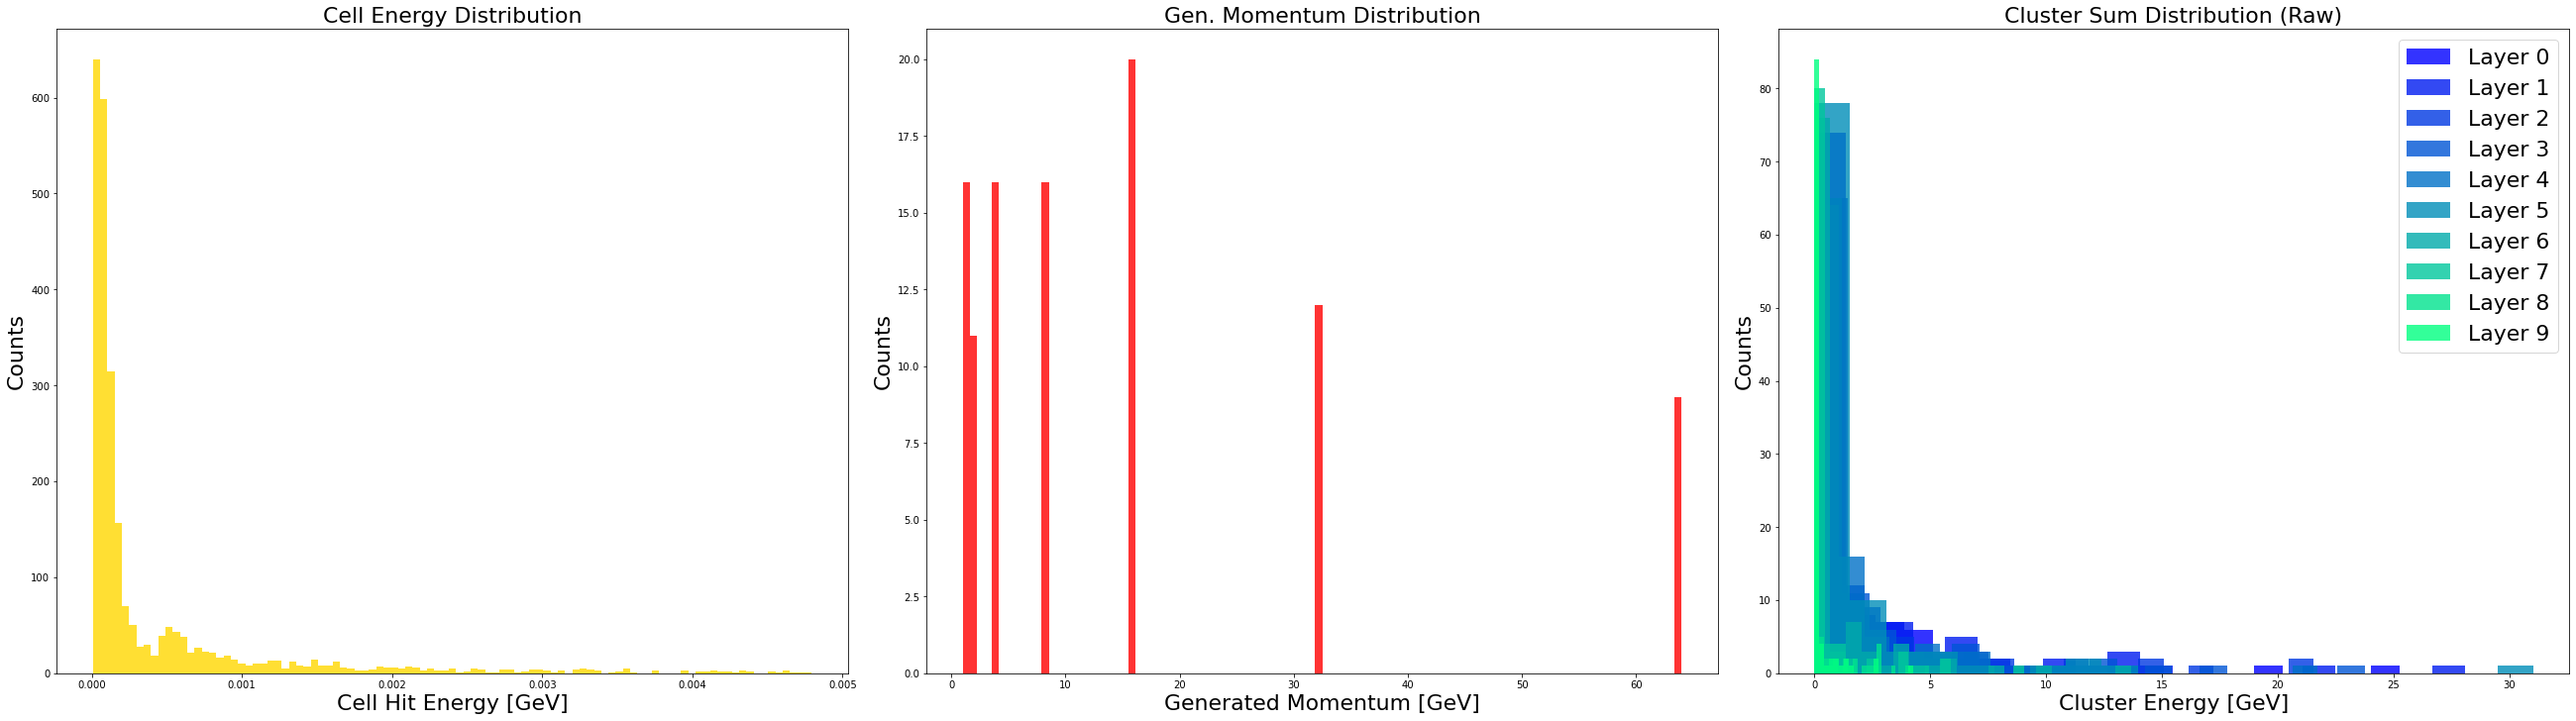

In [11]:
flat_hits_e = load_flat_hits_e(label)
energy_QA_plots(flat_hits_e, GenP, segmented_ClusterSum, label)

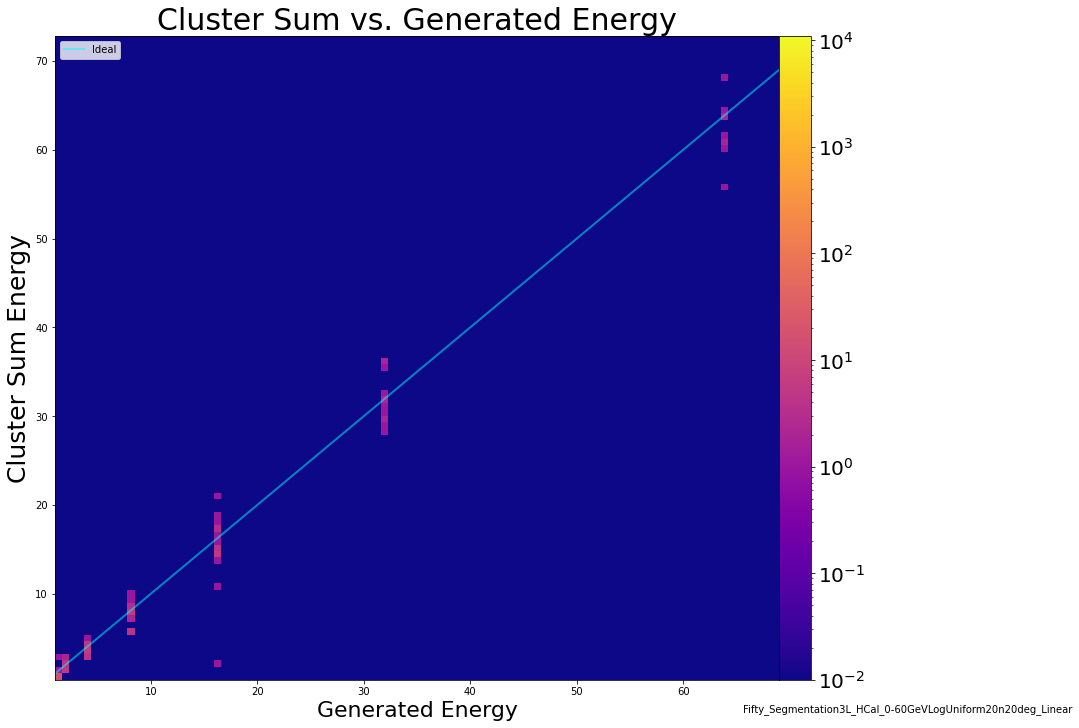

In [12]:
ClusterSum_vs_GenP(ClusterSum, GenP, label)

In [13]:
segmented_ClusterSum

array([[1.46514890e+00, 1.30523684e+00, 1.56372071e+00, 1.83105465e-01,
        5.79833977e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.75891116e+00, 6.00372320e+00, 2.12127687e+00, 1.23352051e+00,
        1.59606933e-01, 2.71301266e-01, 6.08520516e-01, 1.98364260e-02,
        4.36401374e-02, 2.07519533e-02],
       [2.85522459e+00, 4.79248043e+00, 2.29736331e+00, 2.05688475e+00,
        1.88323972e+00, 7.40661626e-01, 3.32641603e-01, 2.67639163e-01,
        7.93457020e-02, 7.65991206e-02],
       [1.06658936e+00, 4.01306150e+00, 2.58728028e+00, 1.72943116e+00,
        2.02270508e+00, 4.22454836e+00, 6.07299807e-01, 4.24499509e-01,
        1.83105471e-01, 3.66210934e-03],
       [1.03942872e+00, 1.01449585e+01, 8.54553216e+00, 8.79821771e-01,
        4.86755377e-01, 6.10351559e-02, 9.46044952e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.29724112e+00, 1.39407348e+01, 1.12417602e+01, 2.52502440e+00,
   

(array([261928.,  70260.,  28504.,  41670.,  27753.,   1731.,   5637.,
         34844.,  26748.,    768.]),
 array([2.44140629e-03, 8.26217654e+00, 1.65219117e+01, 2.47816468e+01,
        3.30413820e+01, 4.13011171e+01, 4.95608522e+01, 5.78205874e+01,
        6.60803225e+01, 7.43400577e+01, 8.25997928e+01]),
 <BarContainer object of 10 artists>)

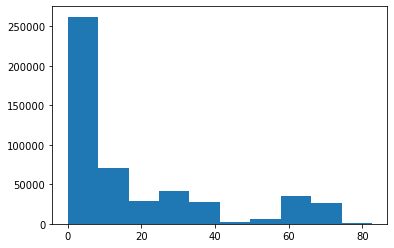

In [17]:
plt.hist(ClusterSum)

In [18]:
%pip install enenrgyflow

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement enenrgyflow (from versions: none)
ERROR: No matching distribution found for enenrgyflow
Note: you may need to restart the kernel to use updated packages.


In [19]:
from NN_Regression import *

In [20]:
NN_Regression = NN_Regrif (Do_Training):
    NN_Regression.run_NN_regression() essor(label,n_calo_layers)

In [21]:
if (Do_Training):
    NN_Regression.run_NN_regression() 

Loading Segmented Cluster Sum, shape = (499843, 10)
Nevents =  499843
Nevents =  499843


2023-04-16 03:46:34.146346: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /global/common/software/nersc/pm-2022q4/sw/evp-patch/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/math_libs/11.7/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/extras/CUPTI/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/extras/Debugger/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/nvvm/lib64:/opt/nvidia/hpc_sdk/Linux_x86_64/22.7/cuda/11.7/lib64:/opt/cray/pe/papi/7.0.0.1/lib64:/opt/cray/pe/gcc/11.2.0/snos/lib64:/opt/cray/libfabric/1.15.2.0/lib64
2023-04-16 03:46:34.146731: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/ins

Epoch 1/400
250/250 [==============================] - 2s 4ms/step - loss: 2.8346 - val_loss: 1.5329 - lr: 0.0010
Epoch 2/400
250/250 [==============================] - 1s 3ms/step - loss: 1.5095 - val_loss: 1.5303 - lr: 0.0010
Epoch 3/400
250/250 [==============================] - 1s 3ms/step - loss: 1.4917 - val_loss: 1.4831 - lr: 0.0010
Epoch 4/400
250/250 [==============================] - 1s 3ms/step - loss: 1.4853 - val_loss: 1.4815 - lr: 0.0010
Epoch 5/400
250/250 [==============================] - 1s 3ms/step - loss: 1.4807 - val_loss: 1.4845 - lr: 0.0010
Epoch 6/400
250/250 [==============================] - 1s 3ms/step - loss: 1.4789 - val_loss: 1.4815 - lr: 0.0010
Epoch 7/400
250/250 [==============================] - 1s 3ms/step - loss: 1.4722 - val_loss: 1.4797 - lr: 0.0010
Epoch 8/400
250/250 [==============================] - 1s 3ms/step - loss: 1.4732 - val_loss: 1.4846 - lr: 0.0010
Epoch 9/400
250/250 [==============================] - 1s 3ms/step - loss: 1.4655 - val_

In [22]:
x_test = np.load(f"./{label}/x_test.npy")
y_test = np.load(f"./{label}/y_test.npy")
preds = np.load(f"./{label}/predictions.npy")
loss = np.load(f"./{label}/loss.npy")
val_loss = np.load(f"./{label}/val_loss.npy")

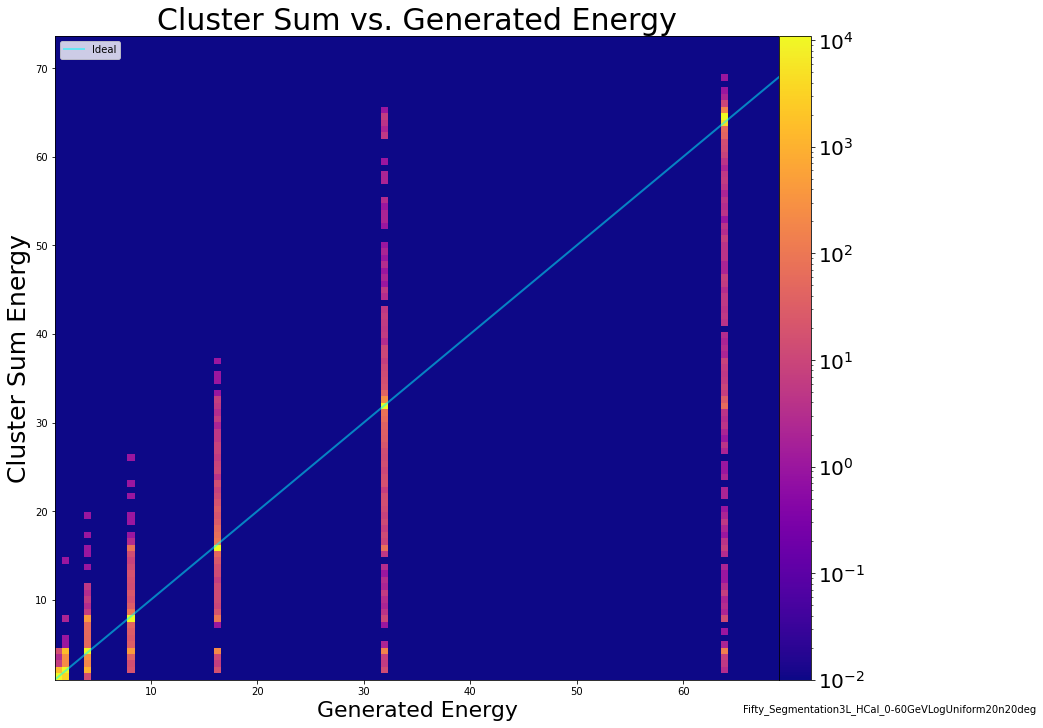

In [23]:
ClusterSum_vs_GenP(preds[:,0],y_test,label)

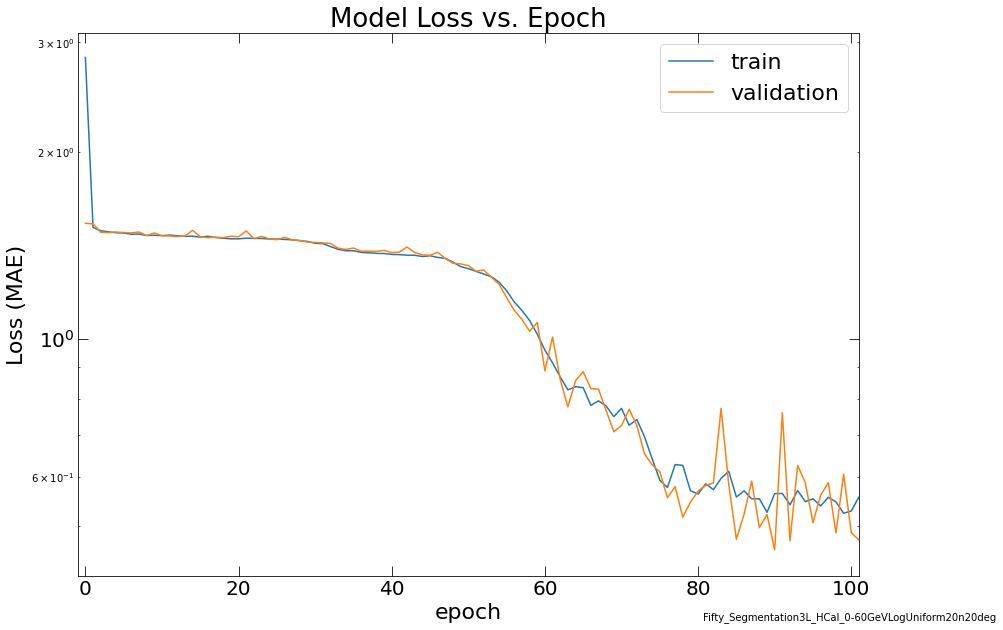

In [24]:
Plot_Loss_Curve(loss,val_loss,label,loss_string="MAE") #label loss yourself here

In [25]:
simple_sum = x_test
if len(np.shape(x_test))>1:
    simple_sum = np.sum(x_test,axis=-1)

NN = get_res_scale(y_test,preds,Energy_Bins,label) #Label here will save. Make sure not to save strawman!
strawman = get_res_scale(y_test,simple_sum,Energy_Bins)

NN_in_RecoBins = get_res_scale_in_reco_bins(y_test,preds,simple_sum,Energy_Bins,label)
strawman_in_RecoBins = get_res_scale_in_reco_bins(y_test,simple_sum,simple_sum,Energy_Bins)

print(NN.keys())
print(NN_in_RecoBins.keys())

/global/u2/h/hyunohy/Untitled Folder/regressiononly/functions/data_functions.py:71: RuntimeWarning: invalid value encountered in true_divide
  avg_truth = avg_truth/counter
/global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/global/u2/h/hyunohy/Untitled Folder/regressiononly/functions/data_functions.py:76: RuntimeWarning: Mean of empty slice
  avg_scale  =   np.nanmean(scale_array,axis=-1)
/global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/global/u2/h/hyunohy/Untitled Folder/regressiononly/functions/data_functions.py:133: RuntimeWarning: invalid value encountered in true_divide
  avg_reco = avg_reco/counter

dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])
dict_keys(['avg_reco', 'avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


In [26]:
NN["resolution"]

array([0.57885664, 0.11654583, 0.10735386,        nan,        nan,
       0.10436262,        nan,        nan,        nan,        nan,
              nan, 0.10213698,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan])

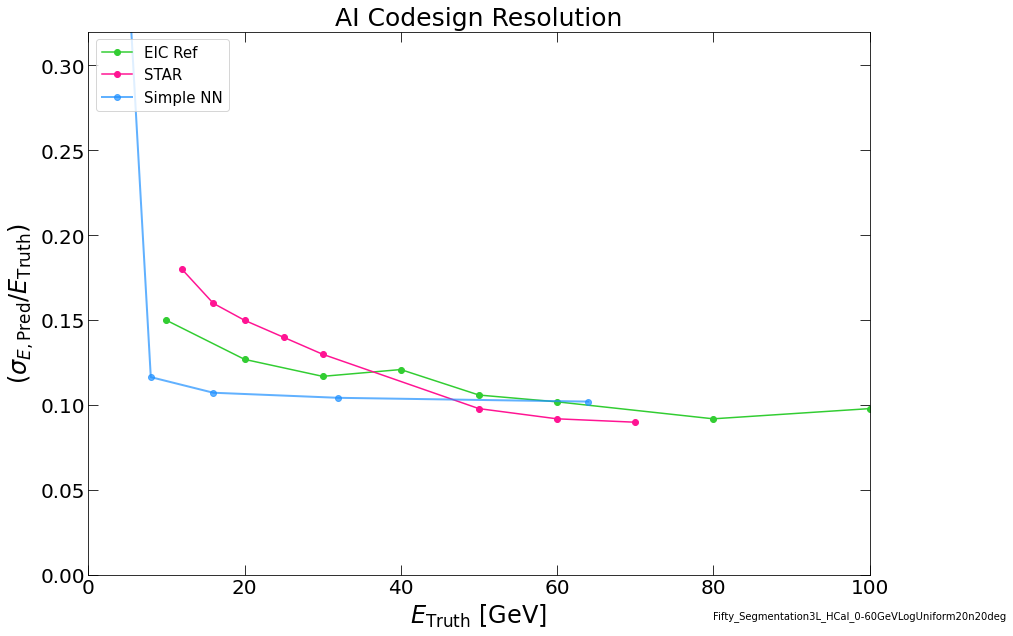

In [27]:
Plot_Resolutions(NN,strawman,label)

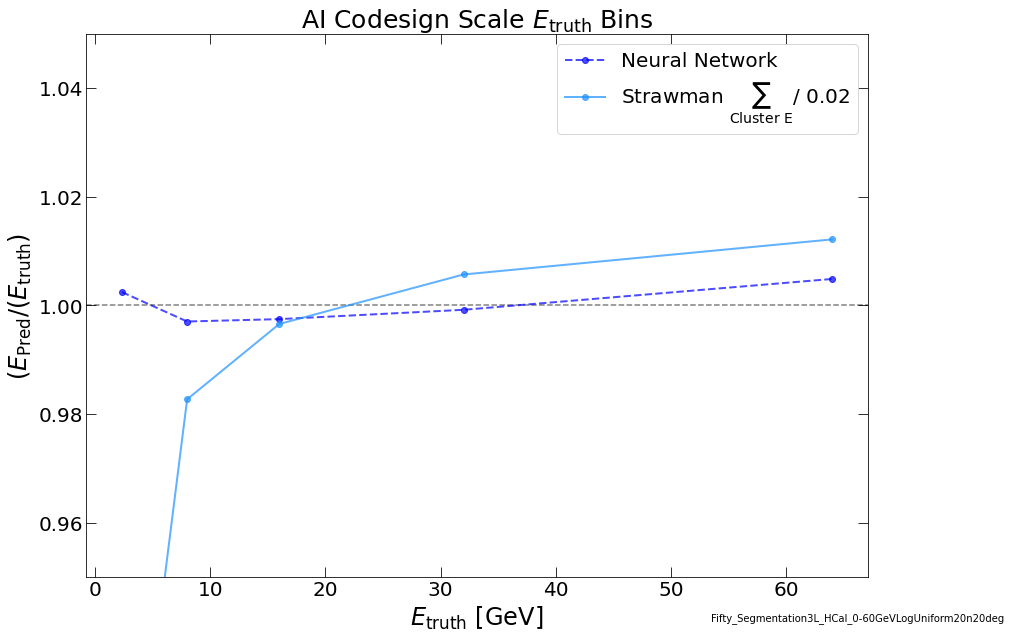

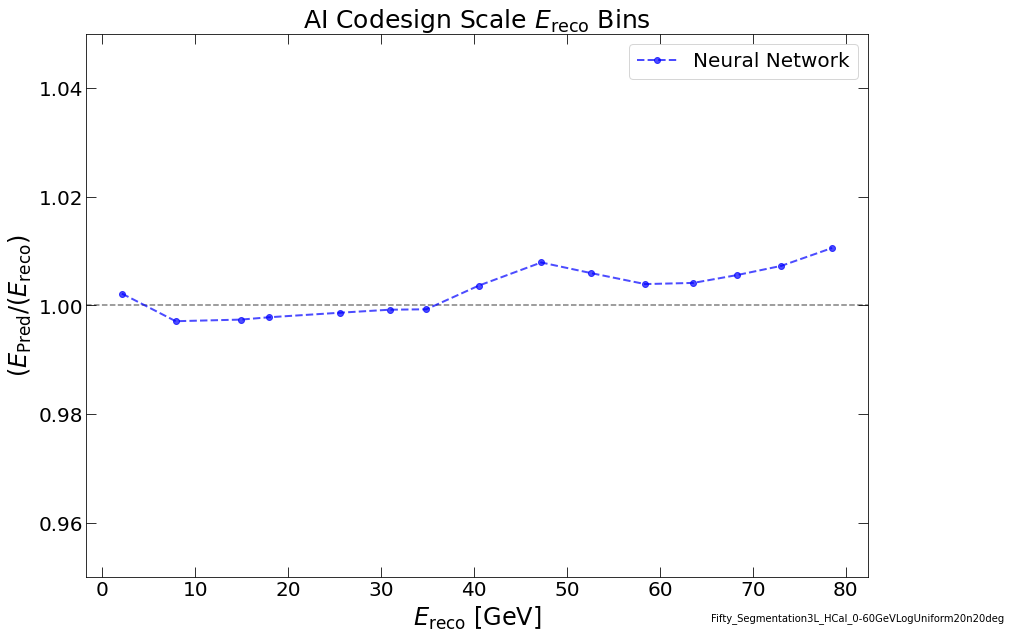

In [28]:
Plot_Energy_Scale(NN,label,sampling_fraction,strawman)
Plot_Energy_Scale(NN_in_RecoBins,label,sampling_fraction,None,"reco")

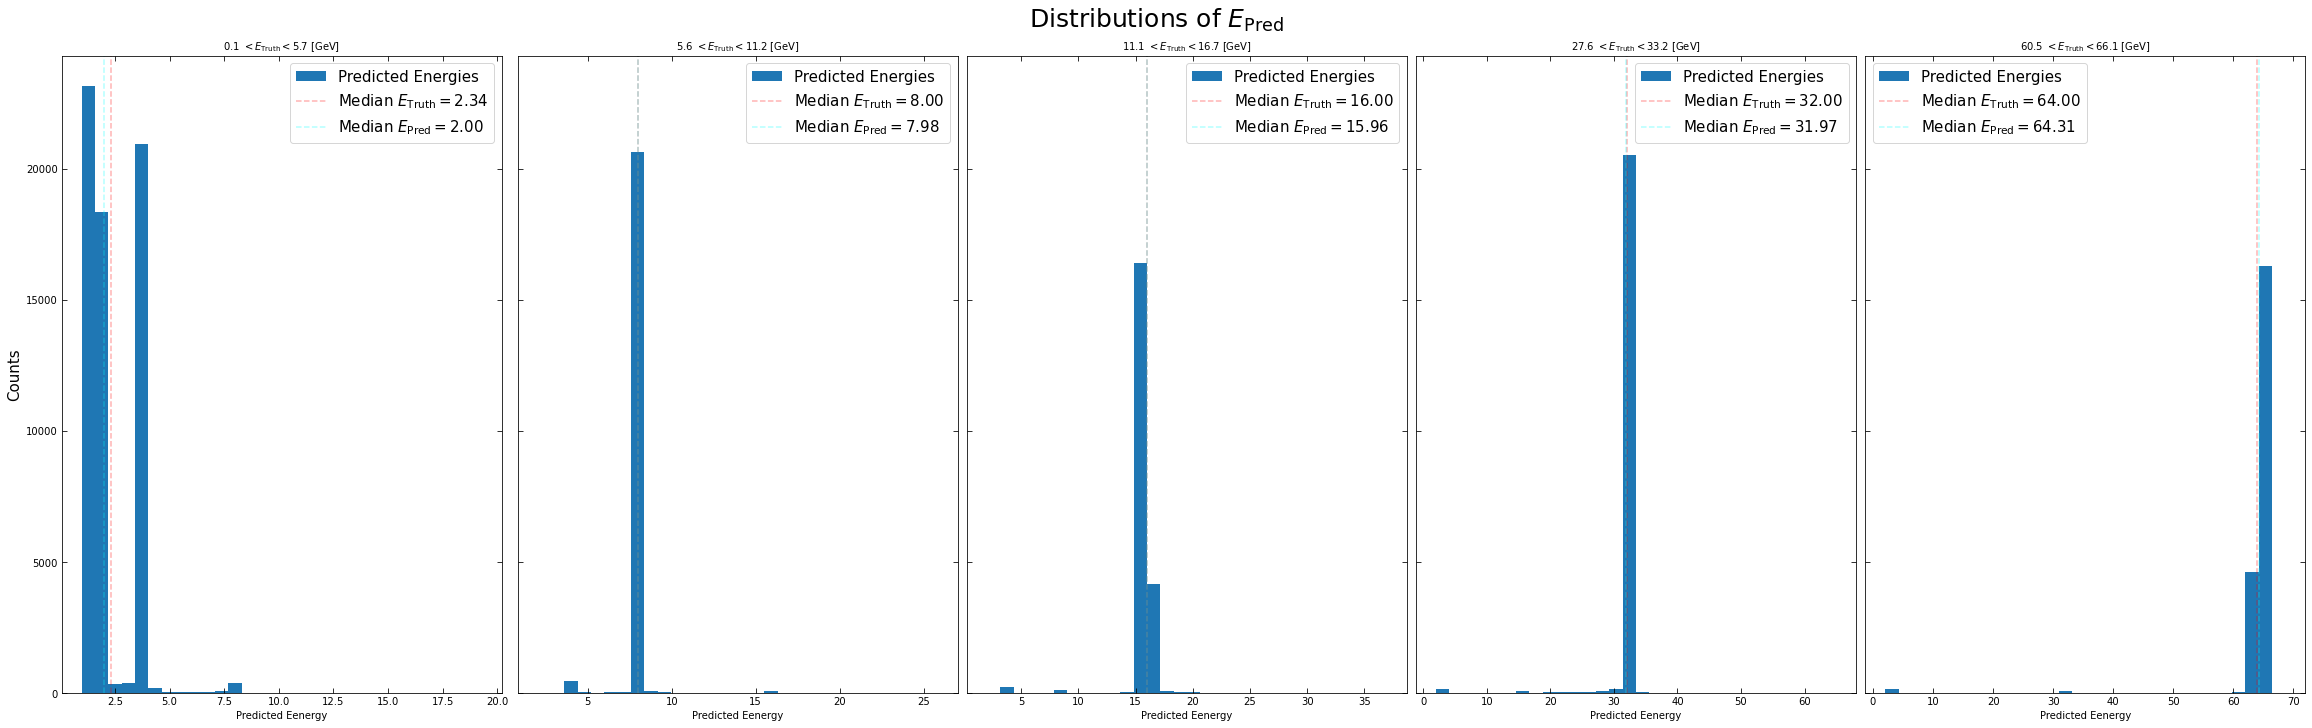

In [29]:
plot_slices(NN["slices"],NN['avg_truth'],label,Energy_Bins,"Truth",)

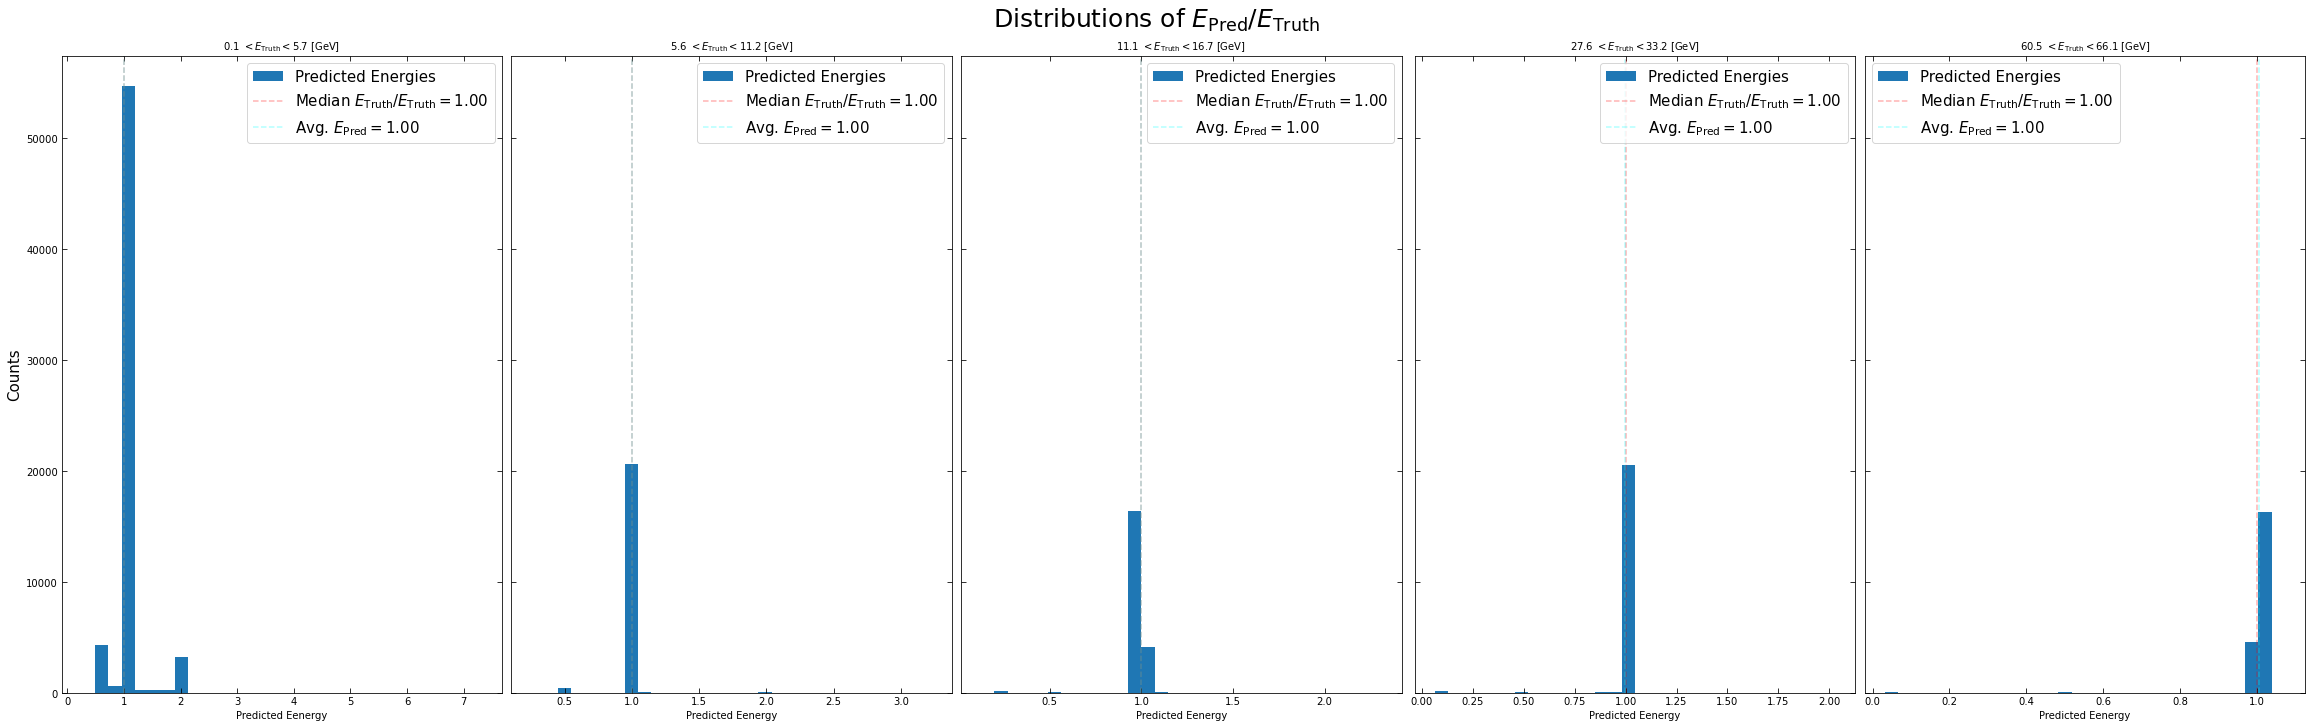

In [30]:
plot_slices(NN["scale_array"],NN['avg_truth'],label, Energy_Bins,"Truth",scale=True)